In [1]:
!pip install -e ..

Obtaining file:///E:/Git/asim
  Attempting uninstall: geneticalgo
    Found existing installation: geneticalgo 0.0.1.dev1
    Uninstalling geneticalgo-0.0.1.dev1:
      Successfully uninstalled geneticalgo-0.0.1.dev1
  Running setup.py develop for geneticalgo


In [2]:
import geneticalgo as ga
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Risk Assessment
- Number of transactions
- Hit/Miss ratio
- MaxDown

In [3]:
ticker_list = ga.genetic.get_ticker_list()
print(ticker_list)

['AAL', 'ALK', 'APD', 'AEP', 'AXP', 'AFL', 'AIG', 'AME', 'AMGN', 'ADI', 'APA', 'ADM']


In [4]:
ticker_table = ga.genetic.signal_table_for_ticker(ticker_list)

The number of indicators in the genome is 22
Signal table for AAL was created
The number of indicators in the genome is 22
Signal table for ALK was created
The number of indicators in the genome is 22
Signal table for APD was created
The number of indicators in the genome is 22
Signal table for AEP was created
The number of indicators in the genome is 22
Signal table for AXP was created
The number of indicators in the genome is 22
Signal table for AFL was created
The number of indicators in the genome is 22
Signal table for AIG was created
The number of indicators in the genome is 22
Signal table for AME was created
The number of indicators in the genome is 22
Signal table for AMGN was created
The number of indicators in the genome is 22
Signal table for ADI was created
The number of indicators in the genome is 22
Signal table for APA was created
The number of indicators in the genome is 22
Signal table for ADM was created


In [5]:
df_genetic = pd.read_csv("../data/2022-01-17_Genetic_Algo_12Stocks_Rounded_Best.csv")

In [6]:
df_genetic.drop(columns=["Unnamed: 0"], inplace = True)

In [7]:
df_genetic.values.tolist()

[['AAL', '0000000000000100000000', 174.8, 0.17, 0.11, 146.86, -0.02, -0.39],
 ['ADI', '1000000000001010100000', 159.14, 0.06, 1.81, 184.45, 0.23, 1.04],
 ['ADM', '0000001000001111000100', 161.01, 0.07, 0.42, 161.98, 0.08, 0.39],
 ['AEP', '0000001100000000011000', 171.38, 0.14, 1.26, 149.95, -0.0, 0.02],
 ['AFL', '0000000000000000001010', 190.86, 0.27, -0.09, 164.61, 0.1, 0.2],
 ['AIG', '0000000000001000010000', 190.7, 0.27, 0.24, 161.42, 0.08, 0.43],
 ['ALK', '0010000100101111001000', 164.12, 0.09, 0.81, 141.94, -0.05, -0.21],
 ['AME', '1000000000001000101000', 170.34, 0.14, 0.84, 175.72, 0.17, 0.92],
 ['AMGN', '1001001000001000010100', 179.4, 0.2, 2.42, 147.93, -0.01, 0.03],
 ['APA', '0001000001001001000110', 171.62, 0.14, -0.71, 150.0, 0.0, -0.16],
 ['APD', '0000000000001010000000', 207.66, 0.38, 0.9, 205.37, 0.37, 0.83],
 ['AXP', '0000000100001100000001', 179.94, 0.2, 1.6, 172.46, 0.15, 0.46]]

In [34]:
results = []

for row in df_genetic.values.tolist():
    
    df_stock, encoding = ticker_table[row[0]]
    
    df_training, df_test = ga.genetic.split_df(df_stock)
    
    portfolio, transactions, hitmiss, maxdown, list_return, list_signal = ga.trading.stock_return([int(i) for i in row[1]], df_test, encoding)
    
    row.extend([portfolio, transactions, hitmiss, maxdown, len(df_test.index)])
    
    results.append(row)

In [35]:
df_ga = pd.DataFrame(results, columns=["Ticker", "Genome", "In Sample Fitness", "In Sample Percentage", "Training Return", "Out Sample Fitness", "Out Sample Percentage", "Test Return", "Control Out Sample Fitness", "Transactions", "Hit/Miss", "MaxDown", "N"])

In [36]:
df_ga

,Ticker,Genome,In Sample Fitness,In Sample Percentage,Training Return,Out Sample Fitness,Out Sample Percentage,Test Return,Control Out Sample Fitness,Transactions,Hit/Miss,MaxDown,N
0,AAL,0000000000000100000000,174.80,0.17,0.11,146.86,-0.02,-0.39,146.857916,30,0.533333,139.132712,502
1,ADI,1000000000001010100000,159.14,0.06,1.81,184.45,0.23,1.04,184.454848,14,0.857143,150.000000,750
2,ADM,0000001000001111000100,161.01,0.07,0.42,161.98,0.08,0.39,161.977239,12,0.666667,150.000000,750
3,AEP,0000001100000000011000,171.38,0.14,1.26,149.95,-0.00,0.02,149.948000,8,0.500000,145.291649,750
4,AFL,0000000000000000001010,190.86,0.27,-0.09,164.61,0.10,0.20,164.606663,102,0.529412,131.007411,750
5,AIG,0000000000001000010000,190.70,0.27,0.24,161.42,0.08,0.43,161.421001,52,0.538462,133.327999,750
6,ALK,0010000100101111001000,164.12,0.09,0.81,141.94,-0.05,-0.21,141.937416,10,0.200000,141.937416,750
7,AME,1000000000001000101000,170.34,0.14,0.84,175.72,0.17,0.92,175.721292,14,0.857143,150.000000,750
8,AMGN,1001001000001000010100,179.40,0.20,2.42,147.93,-0.01,0.03,147.925643,4,0.500000,147.925643,750
9,APA,0001000001001001000110,171.62,0.14,-0.71,150.00,0.00,-0.16,150.000000,0,0.000000,150.000000,750


In [28]:
df_ga[["Hit/Miss", "MaxDown"]] = df_ga[["Hit/Miss", "MaxDown"]].apply(lambda x: round(x, 2))
df_ga.drop(columns=["In Sample Fitness", "In Sample Percentage", "Training Return", "Control Out Sample Fitness"], inplace=True)

In [29]:
df_ga

,Ticker,Genome,Out Sample Fitness,Out Sample Percentage,Test Return,Transactions,Hit/Miss,MaxDown
0,AAL,0000000000000100000000,146.86,-0.02,-0.39,30,0.53,139.13
1,ADI,1000000000001010100000,184.45,0.23,1.04,14,0.86,150.00
2,ADM,0000001000001111000100,161.98,0.08,0.39,12,0.67,150.00
3,AEP,0000001100000000011000,149.95,-0.00,0.02,8,0.50,145.29
4,AFL,0000000000000000001010,164.61,0.10,0.20,102,0.53,131.01
5,AIG,0000000000001000010000,161.42,0.08,0.43,52,0.54,133.33
6,ALK,0010000100101111001000,141.94,-0.05,-0.21,10,0.20,141.94
7,AME,1000000000001000101000,175.72,0.17,0.92,14,0.86,150.00
8,AMGN,1001001000001000010100,147.93,-0.01,0.03,4,0.50,147.93
9,APA,0001000001001001000110,150.00,0.00,-0.16,0,0.00,150.00


In [30]:
df_ga.to_csv("../data/2022-01-17_Genetic_Algo_12Stocks_Rounded_Best_Risk.csv")

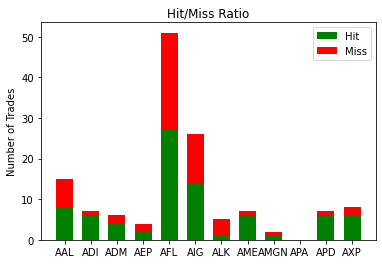

In [33]:
labels = df_ga["Ticker"].to_list()
df_ga["Hit"] = (df_ga["Transactions"] / 2) * df_ga["Hit/Miss"]
df_ga["Miss"] = (df_ga["Transactions"] / 2) * (1 - df_ga["Hit/Miss"])
hit = df_ga["Hit"].to_list()
miss = df_ga["Miss"].to_list()
width = 0.65

fig, ax = plt.subplots()

ax.bar(labels, hit, width, label="Hit", color="green")
ax.bar(labels, miss, width, label="Miss", bottom=hit, color="red")

ax.set_ylabel("Number of Trades")
ax.set_title("Hit/Miss Ratio")
ax.legend()

plt.savefig("../data/2022-03-07_RiskAssessment_12Stocks_Best_Combinations.png")
plt.show()

## Single Example

In [49]:
ticker = "ADI"
genome = "0000000000000100000000"

In [50]:
df_stock, encoding = ticker_table[ticker]

In [51]:
df_training, df_test = ga.genetic.split_df(df_stock)

In [52]:
ga.trading.resolve_genome([int(i) for i in genome], encoding)

['price_sma_20_cross']

In [53]:
portfolio, transactions, hitmiss, maxdown, list_return, list_signal = ga.trading.stock_return([int(i) for i in "0000000000000100000000"], df_test, encoding)

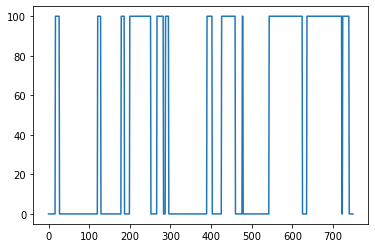

In [54]:
plt.plot(list_return)

In [55]:
df_test

,datadate,Open,Close,High,Low,Volume,Typical_Price,bb_5_bbli,bb_10_bbli,bb_20_bbli,...,price_sma_100_cross,ema_20,ema_50,price_ema_20_50_cross,price_ema_20_cross,price_ema_50_cross,adx_25,adx,macd_s26_f12_si9,macd
2252,2018-12-13,89.67,88.46,89.990,88.0800,1668358.0,88.843333,0.0,0.0,0.0,...,0.0,88.781843,88.689618,0.0,0.0,0.0,11.624014,0.0,0.456829,0.0
2253,2018-12-14,87.48,87.27,88.390,86.9700,2947820.0,87.543333,0.0,0.0,0.0,...,0.0,88.637858,88.633946,0.0,0.0,0.0,11.509016,0.0,0.281932,0.0
2254,2018-12-17,87.25,87.31,88.960,86.7500,2760243.0,87.673333,0.0,0.0,0.0,...,0.0,88.511395,88.582027,0.0,0.0,0.0,11.136482,0.0,0.144882,0.0
2255,2018-12-18,88.23,88.05,89.360,87.5000,2855437.0,88.303333,0.0,0.0,0.0,...,0.0,88.467453,88.561163,0.0,0.0,0.0,10.601347,0.0,0.094887,0.0
2256,2018-12-19,86.73,83.69,87.920,83.2429,4211623.0,84.950967,0.0,1.0,1.0,...,0.0,88.012457,88.370137,0.0,0.0,0.0,11.633534,0.0,-0.293171,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,2021-11-29,180.54,183.20,183.690,178.4500,4342671.0,181.780000,0.0,0.0,0.0,...,0.0,182.199912,177.715114,0.0,0.0,0.0,18.364986,0.0,2.007946,0.0
2998,2021-11-30,182.61,180.25,184.260,178.9100,4561770.0,181.140000,0.0,0.0,0.0,...,0.0,182.014206,177.814521,0.0,0.0,0.0,17.178818,0.0,1.623281,0.0
2999,2021-12-01,182.28,180.84,188.195,180.6500,4831258.0,183.228333,0.0,0.0,0.0,...,0.0,181.902377,177.933167,0.0,1.0,0.0,17.060610,0.0,1.350472,0.0
3000,2021-12-02,180.00,180.63,182.530,178.0000,3793911.0,180.386667,0.0,0.0,0.0,...,0.0,181.781198,178.038925,0.0,0.0,0.0,16.189663,0.0,1.104590,0.0
